In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
%matplotlib notebook

In [74]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\turner.csv')
d2 = data.iloc[0:, 0:-3]
d2.head()

,APINO,COMPANY,WELL_CLASS,HORIZ_DIR,Latitude,Longitude,IP_date_1st_prod,IP_date,IP_oil_volume_BBL,IP_gas_volume_MCF,...,Cumulative_Water_thru2016,Cumulative_Days_thru2016,BBLS_Oil_Day_thru2016,MCF_Day_thru2016,BBLS_Water_Day_thru2016,ProducingInterval_Length_ft,Cemented_Liner,SHLtoBHL_Lateral_length_ft,Length_Difference,Lateral_Azimuth
0,561452,ABRAXAS PETROLEUM CORPORATION,O,H,43.53,-105.40,20120311.0,20120430.0,148.00,1640.00,...,48689.0,1685.0,50.76,1124.73,28.90,3583.0,Y,4390.4,-807.4,167.7
1,923003,ABRAXAS PETROLEUM CORPORATION,O,H,43.26,-104.91,20000828.0,20091118.0,207.00,100.00,...,270.0,4600.0,9.15,8.02,0.06,3985.0,Y then N,4524.3,-539.3,43.8
2,2720996,ABRAXAS PETROLEUM CORPORATION,O,H,43.28,-104.89,20000829.0,20000925.0,235.00,193.00,...,0.0,5131.0,19.84,21.49,0.00,3061.0,N,4000.9,-939.9,328.0
3,928810,ANADARKO E&P ONSHORE LLC,O,H,42.92,-105.04,20130914.0,20130928.0,379.00,548.00,...,73931.0,1117.0,30.95,110.60,66.19,1166.0,N,3652.6,-2486.6,333.0
4,929130,ANADARKO E&P ONSHORE LLC,O,H,42.92,-105.04,20151220.0,20160120.0,537.22,1491.45,...,46019.0,364.0,238.57,683.71,126.43,3886.0,Y,5432.7,-1546.7,175.8


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\hypertools\tools\format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


<IPython.core.display.Javascript object>


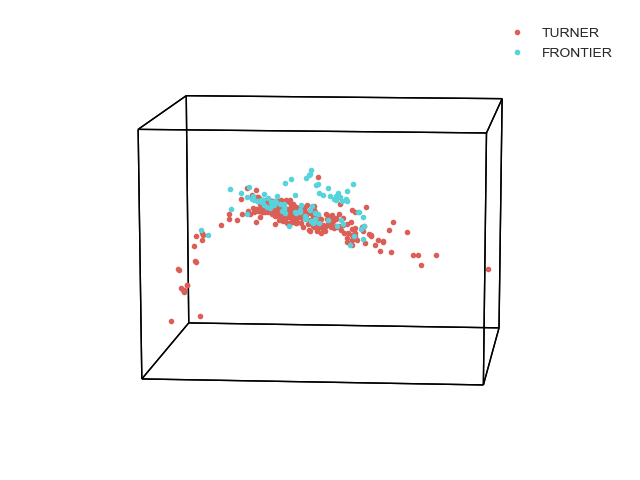

In [75]:
hyp.plot(d2, '.', hue=data.Prod_Download_Reservoir.values, legend=list(set(data.Prod_Download_Reservoir.values)))

In [20]:
list(set(data.IP_Reservoir.values))

['TURNER',
 'FRONTIER-1, 2nd bench',
 'FRONTIER-1, 2nd bench lower',
 'FRONTIER',
 'FRONTIER-1']